# Image Classification - CIFAR10

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.




---

Here are the classes in the dataset, as well as 10 random images from each:										

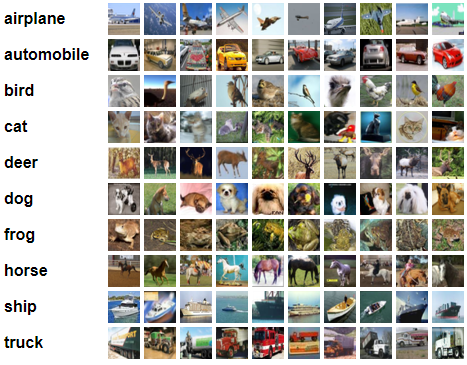


**Source :** https://www.cs.toronto.edu/~kriz/cifar.html

### Train - Validation - Test Sets

---

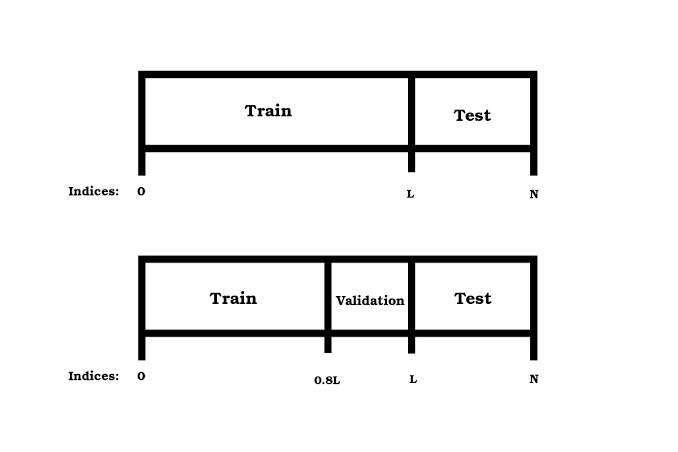

### Imports

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

## Prepare dataset

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# train set - images
x_train.shape

In [ ]:
CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

In [ ]:
# sample training data
index = 1415
plt.imshow(x_train[index], vmin=32, vmax=32)
print(CLASSES[int(y_train[index])])

In [ ]:
# sample test data
index = 3940
plt.imshow(x_test[index])
print(CLASSES[int(y_test[index])])

**use float32 instead of uint8**

In [ ]:
# before
print(x_train.dtype)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

**Normalize pixel values**

In [ ]:
x_train /= 255
x_test /= 255

In [ ]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Prepare model

In [ ]:
first_model = Sequential()
first_model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
first_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
first_model.add(MaxPooling2D(pool_size=(2, 2)))
first_model.add(Flatten())
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

In [ ]:
first_model.summary()

In [ ]:
from keras.utils import plot_model
plot_model(first_model)

In [ ]:
# compile model
first_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001), #SGD()
              metrics=['accuracy'])

## Training

In [ ]:
history = first_model.fit(x_train, y_train,
          batch_size=256,
          epochs=20,
          verbose=1,
          validation_split=0.2)

## Evaluate Model

In [ ]:
score = first_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Save model & weights to disk

In [ ]:
first_model.save('my_first_cifar10_model.h5')

## (Optional) Test model with single image

In [ ]:
#download images
!wget -O test_cifar_ship.jpg https://khosann.com/wp-content/uploads/2017/12/yük_gemisi-elektrikli-elektrikli_gemi-çin-guangzhou.jpg
!wget -O test_cifar_airplane.jpg https://www.airlineratings.com/wp-content/uploads/uploads/B797.jpg

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
# load model from file
first_model = load_model('my_first_cifar10_model.h5')

In [ ]:
# load image from file
image = load_img("test_cifar_airplane.jpg", target_size=(32, 32))
image = img_to_array(image) / 255 
image = np.expand_dims(image, axis=0)
print('shape:', image.shape)

In [ ]:
preds = first_model.predict(image)

In [ ]:
preds

In [ ]:
CLASSES[preds.argmax()]

In [ ]:
plt.imshow(plt.imread("test_cifar_airplane.jpg"))

## (Optional) Model Training History

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## TODO
Task 1. Download a new image from url and test the trained model

Task 2. Update learning rate and re-train the model

Task 3. Add dropout layer and re-train the model